In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir("C:\\Users\\Raza\\Desktop\\Data sets")

In [2]:
df = pd.read_csv('hospital_patients.csv', sep = ';')

In [5]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [20]:
#standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected = True)
init_notebook_mode(connected = True)

In [9]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [3]:
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)
df = df.drop(['citoglipton', 'examide'], axis = 1)
df = df.replace('?', np.nan)
df = df.replace('Unknown/Invalid', np.nan)
df = df.dropna()
df


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [5]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [4]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [22]:
df['race'].value_counts()

Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1483
Asian                625
Name: race, dtype: int64

In [4]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

8     25305
7     21809
9     16702
6     16697
5      9265
4      3548
10     2717
3      1478
2       466
1        65
Name: age, dtype: int64

In [71]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 2)

In [9]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,2,1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,3,1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,2
3,500364,82442376,Caucasian,Male,4,1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,2
4,16680,42519267,Caucasian,Male,5,1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,2
5,35754,82637451,Caucasian,Male,6,2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,0


Text(0, 0.5, 'Count')

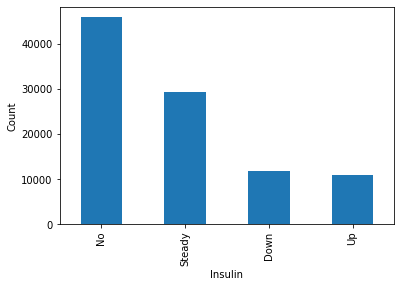

In [7]:
plt.figure()
df['insulin'].value_counts().plot(kind='bar')
plt.xlabel('Insulin')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

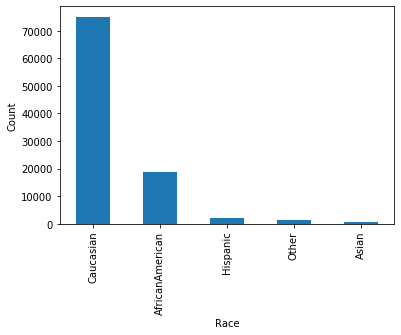

In [8]:
plt.figure()
df['race'].value_counts().plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

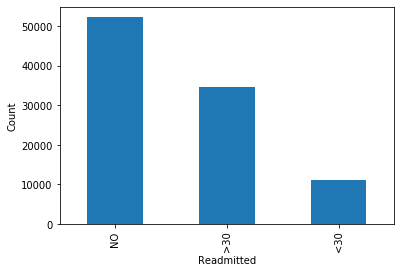

In [6]:
plt.figure()
df['readmitted'].value_counts().plot(kind='bar')
plt.xlabel('Readmitted')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

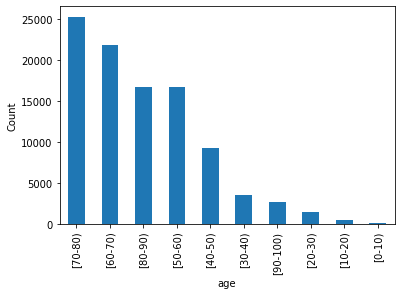

In [10]:
plt.figure()
df['age'].value_counts().plot(kind='bar')
plt.xlabel('age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

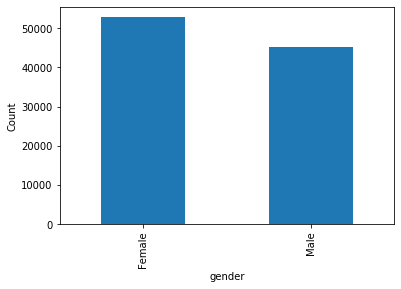

In [11]:
plt.figure()
df['gender'].value_counts().plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('Count')

In [4]:
import seaborn as sns

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

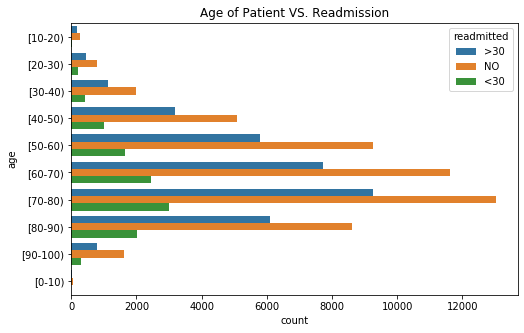

In [9]:
fig = plt.figure(figsize=(8,5))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

Text(0.5, 1.0, 'Race VS. Readmission')

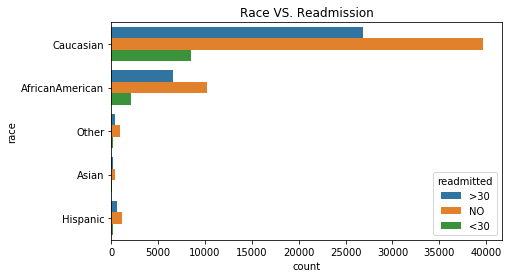

In [26]:
fig = plt.figure(figsize=(7,4))
sns.countplot(y = df['race'], hue = df['readmitted']).set_title('Race VS. Readmission')

Text(0, 0.5, 'Num of Medications')

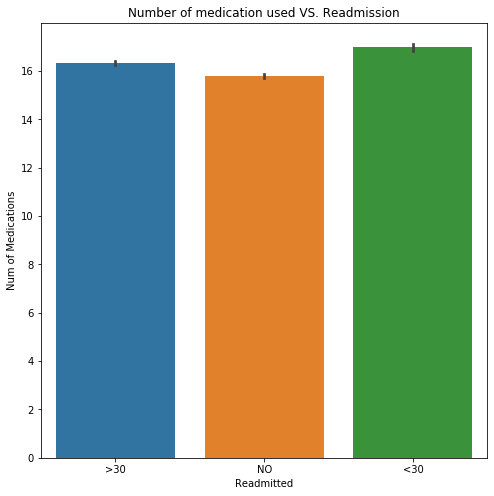

In [16]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

plt.xlabel('Readmitted')
plt.ylabel('Num of Medications')

Text(0, 0.5, 'Time in Hospital')

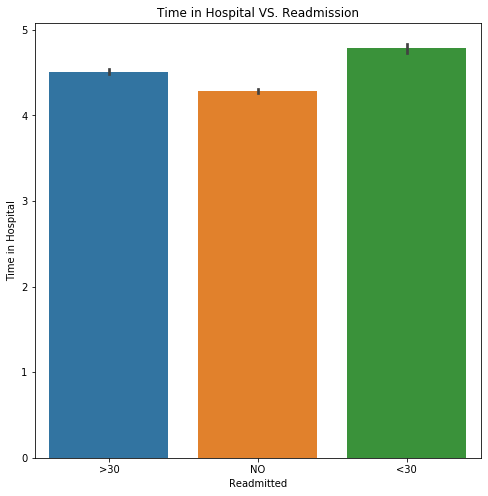

In [30]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['time_in_hospital']).set_title("Time in Hospital VS. Readmission")

plt.xlabel('Readmitted')
plt.ylabel('Time in Hospital')

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

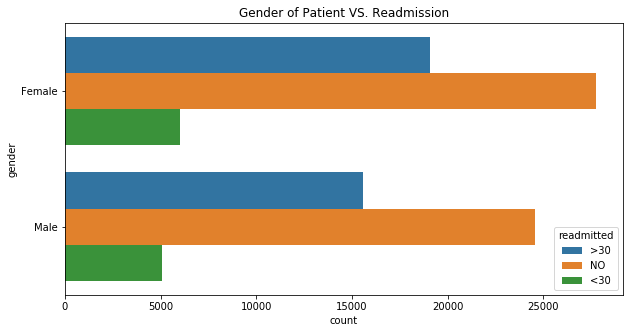

In [20]:
fig = plt.figure(figsize=(10,5))
sns.countplot(y = df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

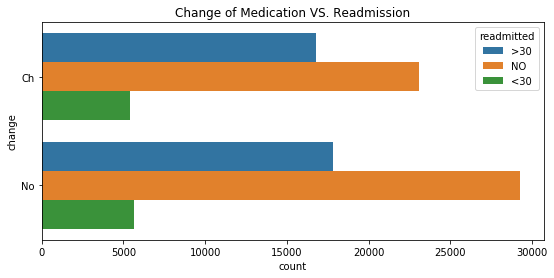

In [24]:
fig = plt.figure(figsize=(9,4))
sns.countplot(y = df['change'], hue = df['readmitted']).set_title('Change of Medication VS. Readmission')

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

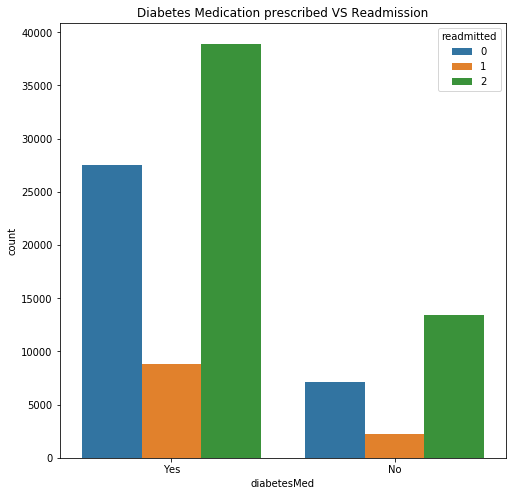

In [19]:
fig = plt.figure(figsize=(8,8))
sns.countplot(  df['diabetesMed'], hue = df['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

Text(0.5, 1.0, 'Insulin VS Readmission')

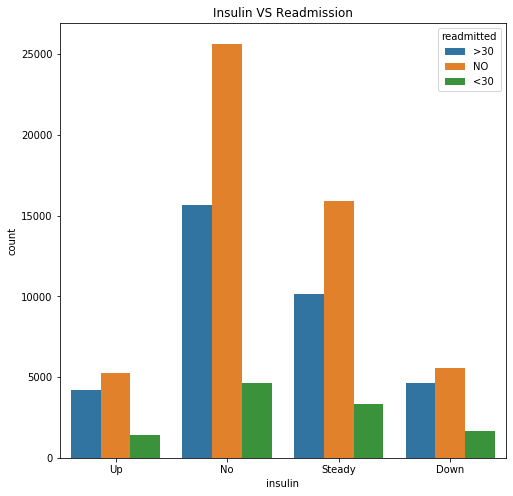

In [25]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = df['insulin'], hue = df['readmitted']).set_title('Insulin VS Readmission')

Text(0.5, 1.0, 'metformin VS Readmission')

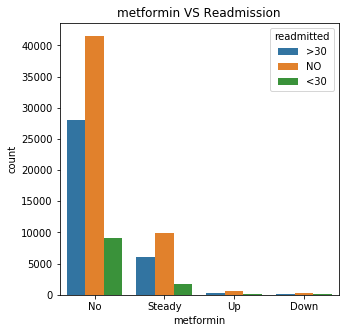

In [52]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x = df['metformin'], hue = df['readmitted']).set_title('metformin VS Readmission')

Text(0.5, 1.0, 'chlorpropamide VS Readmission')

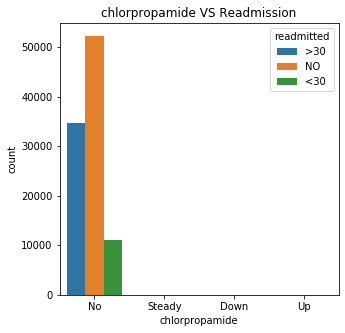

In [55]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x = df['chlorpropamide'], hue = df['readmitted']).set_title('chlorpropamide VS Readmission')

Text(0.5, 1.0, 'glimepiride VS Readmission')

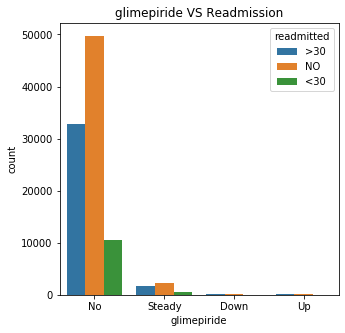

In [54]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x = df['glimepiride'], hue = df['readmitted']).set_title('glimepiride VS Readmission')

Text(0.5, 1.0, 'tolazamide VS Readmission')

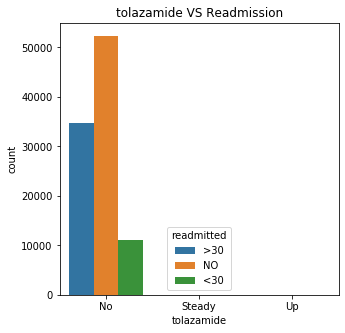

In [57]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x = df['tolazamide'], hue = df['readmitted']).set_title('tolazamide VS Readmission')

Text(0.5, 1.0, 'admission_source_id VS Readmission')

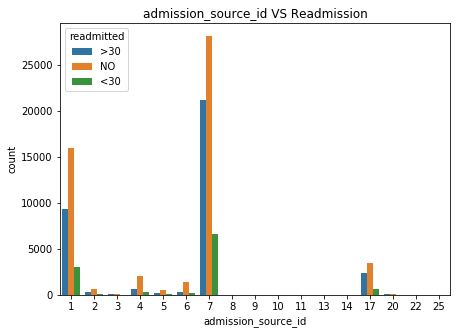

In [69]:
fig = plt.figure(figsize=(7,5))
sns.countplot(x = df['admission_source_id'], hue = df['readmitted']).set_title('admission_source_id VS Readmission')

Text(0.5, 1.0, 'admission_type_id VS Readmission')

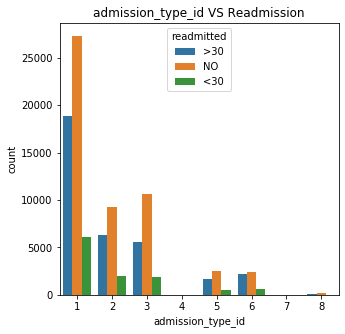

In [66]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x = df['admission_type_id'], hue = df['readmitted']).set_title('admission_type_id VS Readmission')

Text(0.5, 1.0, 'max_glu_serum VS Readmission')

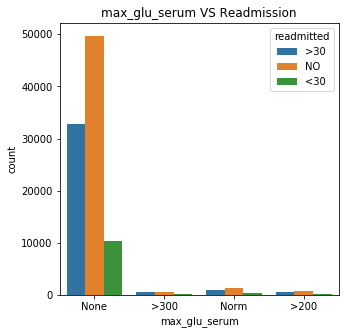

In [65]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x = df['max_glu_serum'], hue = df['readmitted']).set_title('max_glu_serum VS Readmission')

Text(0.5, 1.0, 'A1Cresult VS Readmission')

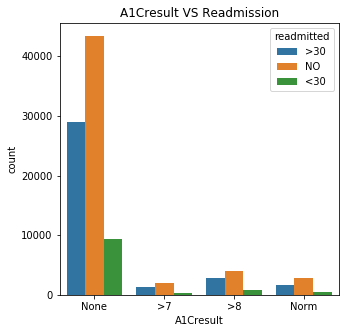

In [64]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x = df['A1Cresult'], hue = df['readmitted']).set_title('A1Cresult VS Readmission')

In [58]:
df['tolazamide'].value_counts()

No        98015
Steady       36
Up            1
Name: tolazamide, dtype: int64

Text(0.5, 1.0, 'Time in hospital VS. Readmission')

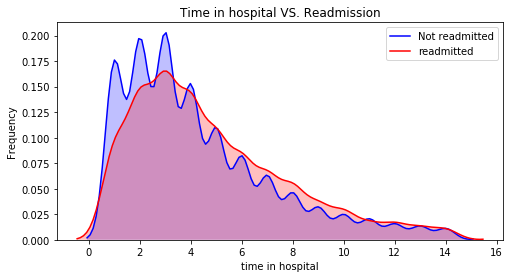

In [78]:
fig = plt.figure(figsize=(8,4),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 2),'time_in_hospital'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='time in hospital', ylabel='Frequency')
plt.title('Time in hospital VS. Readmission')

Text(0.5, 1.0, 'Number of Diagnoses VS. Readmission')

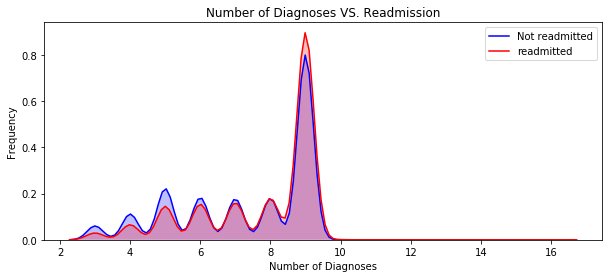

In [83]:
fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 2),'number_diagnoses'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'number_diagnoses'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of Diagnoses', ylabel='Frequency')
plt.title('Number of Diagnoses VS. Readmission')

Text(0.5, 1.0, 'num_medications  VS. Readmission')

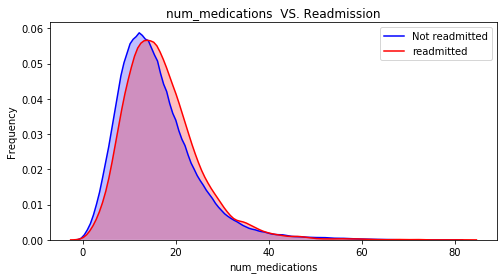

In [80]:
fig = plt.figure(figsize=(8,4),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 2),'num_medications'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_medications'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='num_medications', ylabel='Frequency')
plt.title('num_medications  VS. Readmission')

In [19]:
df['race'] = df['race'].replace('Caucasian', 0)
df['race'] = df['race'].replace('AfricanAmerican', 1)
df['race'] = df['race'].replace('Hispanic', 2)
df['race'] = df['race'].replace('Asian', 3)
df['race'] = df['race'].replace('Other', 4)

In [10]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    df[col] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
    

C:\Users\Raza\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

C:\Users\Raza\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Raza\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Raza\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col